In [1]:
import pandas as pd
import numpy as np
import json
import warnings
import matplotlib as mlp
import matplotlib.pyplot as plt
import timeit


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [2]:
with open('hh_ru1.json', 'r') as file:
    json_data = json.load(file)

In [3]:
df = pd.json_normalize(json_data)
df = df.drop([
    'relations', 'working_days','addition_info.specializations',

    'accept_incomplete_resumes','accept_temporary', 'adv_context', 'adv_response_url', 'alternate_url', 'apply_alternate_url', 'archived',
    'contacts', 'department', 'has_test', 'insider_interview', 'is_adv_vacancy', 'premium', 'sort_point_distance', 'response_letter_required',
    'response_url', 'show_logo_in_search', 'url','working_time_intervals','working_time_modes',    
    'addition_info.accept_handicapped', 'addition_info.accept_incomplete_resumes','addition_info.accept_kids','addition_info.accept_temporary',
    'addition_info.address.building','addition_info.address.description','addition_info.address.lat','addition_info.address.lng','addition_info.address.metro',
    'addition_info.address.metro_stations','addition_info.allow_messages','addition_info.address.street', 'addition_info.alternate_url',
    'addition_info.apply_alternate_url','addition_info.approved','addition_info.archived','addition_info.area.id',
    'addition_info.area.url', 'addition_info.billing_type.id' ,'addition_info.code','addition_info.contacts','addition_info.created_at',
    'addition_info.department','addition_info.driver_license_types', 'addition_info.driver_license_types','addition_info.employer.alternate_url',
    'addition_info.employer.id','addition_info.employer.logo_urls.240','addition_info.employer.logo_urls.90','addition_info.employer.logo_urls.original',
    'addition_info.employer.trusted', 'addition_info.employer.url', 'addition_info.employer.vacancies_url','addition_info.employment.id', 
    'addition_info.experience.name','addition_info.has_test','addition_info.hidden','addition_info.id','addition_info.initial_created_at',
    'addition_info.insider_interview','addition_info.negotiations_url', 'addition_info.premium','addition_info.published_at','addition_info.quick_responses_allowed',
    'addition_info.relations','addition_info.response_letter_required', 'addition_info.response_url','addition_info.salary', 'addition_info.schedule.id',
    'addition_info.suitable_resumes_url','addition_info.test', 'addition_info.type.id', 'addition_info.type.name','addition_info.vacancy_constructor_template',
    'addition_info.working_time_intervals','addition_info.working_days','addition_info.working_time_modes','address.building','address.description',
    'address.id','address.lat','address.lng','address.metro','address.metro_stations','address.street','area.id','area.url','employer.alternate_url',
    'employer.id','employer.logo_urls.240','employer.logo_urls.90','employer.logo_urls.original','employer.trusted','type.id','type.name',
    'employer.url','employer.vacancies_url','employment.id','employment.name','experience.id',
    'addition_info.salary.from','addition_info.salary.gross','schedule.id','address','addition_info.address','addition_info.address.metro.lat','addition_info.address.metro.line_id',
    'addition_info.address.metro.lng','addition_info.address.metro.station_id','addition_info.address.metro.station_name','addition_info.department.id',
    'address.metro.lat','address.metro.line_id','address.metro.line_name','address.metro.lng','address.metro.station_id',
    'addition_info.salary.to','addition_info.salary.currency','addition_info.schedule.name', 'salary', 'addition_info.employer.accredited_it_employer',
    'addition_info.address.metro.line_name','addition_info.department.name','branding.tariff','department.id','addition_info.insider_interview.id',
    'addition_info.insider_interview.url','insider_interview.id','insider_interview.url','addition_info.vacancy_constructor_template.bottom_picture',
    'addition_info.vacancy_constructor_template.id','addition_info.vacancy_constructor_template.name','addition_info.vacancy_constructor_template.top_picture.blurred_path',
    'addition_info.vacancy_constructor_template.top_picture.height','addition_info.vacancy_constructor_template.top_picture.path','addition_info.vacancy_constructor_template.top_picture.width',
    'addition_info.employer.logo_urls','employer.logo_urls','addition_info.vacancy_constructor_template.bottom_picture.blurred_path','addition_info.vacancy_constructor_template.bottom_picture.height',
    'addition_info.vacancy_constructor_template.bottom_picture.path','addition_info.vacancy_constructor_template.bottom_picture.width','brand_snippet.background.color','brand_snippet.background.gradient',
    'brand_snippet.logo','brand_snippet.logo_scalable.default.height','brand_snippet.logo_scalable.default.url','brand_snippet.logo_scalable.default.width',
    'brand_snippet.logo_scalable.xs.height','brand_snippet.logo_scalable.xs.url','brand_snippet.logo_scalable.xs.width','brand_snippet.logo_xs',
    'brand_snippet.picture','brand_snippet.picture_scalable.default.height','brand_snippet.picture_scalable.default.url',
    'brand_snippet.picture_scalable.xs.height','brand_snippet.picture_scalable.xs.url', 'brand_snippet.picture_scalable.xs.width','brand_snippet.picture_xs',
    'addition_info.test.required','addition_info.video_vacancy.cover_picture.resized_height','addition_info.video_vacancy.cover_picture.resized_path','addition_info.video_vacancy.cover_picture.resized_width',
    'brand_snippet.picture_scalable.default.width','addition_info.video_vacancy.video_url',
    'addition_info.billing_type.name', 'addition_info.address.city', 'addition_info.address.raw','addition_info.area.name','experience.name',
    'address.raw',
    'created_at',
    'published_at',
    'addition_info.name',
], axis=1)
df.set_index('id')

df.head()

id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

                                  professional_roles  \
0  [{'id': '96', 'name': 'Программист, разработчи...   
1   [{'id': '107', 'name': 'Руководитель проектов'}]   
2         [{'id': '150', 'name': 'Бизнес-аналитик'}]   
3  [{'id': '96', 'name': 'Программист, разработчи...   
4  [{'id': '83', 'name': 'Оператор call-центра, с...   

                           addition_info.description  \
0  <p><strong>Do you believe in beauty when it co...   
1  <p><strong>Эксперт по автоматизации данных и E...   
2  <p> </p> <p>Ищем человека в нашу международную...   
3  <p><em>Дивизион &quot;Моделирование и исследов...   
4  <p><strong>IDF Eurasia специализируется на dat...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id  \
0                noExperience   
1                between3And6   
2                between1And3   
3                between1And3   
4                noExperience   

                            addition_info.key_skills  \
0   [{'name': 'C/C++'}, {'name': 'Английский язык'}]   
1  [{'name': 'Разработка бизнес-требований'}, {'n...   
2  [{'name': 'SQL'}, {'name': 'Python'}, {'name':...   
3                                                 []   
4  [{'name': 'Пользователь ПК'}, {'name': 'Грамот...   

                             addition_info.languages  \
0                                                 []   
1                                                 []   
2  [{'id': 'eng', 'level': {'id': 'b2', 'name': '...   
3                                                 []   
4                                                 []   

                    addition_info.professional_roles address.city  \
0  [{'id': '96', 'name': 'Программист, разработчи...       Берлин   
1   [{'id': '107', 'name': 'Руководитель проектов'}]          NaN   
2         [{'id': '150', 'name': 'Бизнес-аналитик'}]       Москва   
3  [{'id': '96', 'name': 'Программист, разработчи...          NaN   
4  [{'id': '83', 'name': 'Оператор call-центра, с...          NaN   

         area.name employer.accredited_it_employer            employer.name  \
0  Санкт-Петербург                           False               think-cell   
1           Алматы                           False  AlCom Engineering Group   
2           Москва                            True                     Ozon   
3           Москва                           False                     СБЕР   
4          Саратов                           False              IDF Eurasia   

  salary.currency  salary.from salary.gross  salary.to     schedule.name  \
0             EUR       7500.0         True    10834.0       Полный день   
1             KZT     300000.0        False   500000.0       Полный день   
2             NaN          NaN          NaN        NaN       Полный день   
3             NaN          NaN          NaN        NaN       Полный день   
4             RUR      40000.0        False    60000.0  Удаленная работа   

                                 snippet.requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...  

In [4]:
df['role'] = df['professional_roles'].apply(lambda x: x[0]['name'])
df = df.drop(['professional_roles'],axis=True)
df.head()

id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

                           addition_info.description  \
0  <p><strong>Do you believe in beauty when it co...   
1  <p><strong>Эксперт по автоматизации данных и E...   
2  <p> </p> <p>Ищем человека в нашу международную...   
3  <p><em>Дивизион &quot;Моделирование и исследов...   
4  <p><strong>IDF Eurasia специализируется на dat...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id  \
0                noExperience   
1                between3And6   
2                between1And3   
3                between1And3   
4                noExperience   

                            addition_info.key_skills  \
0   [{'name': 'C/C++'}, {'name': 'Английский язык'}]   
1  [{'name': 'Разработка бизнес-требований'}, {'n...   
2  [{'name': 'SQL'}, {'name': 'Python'}, {'name':...   
3                                                 []   
4  [{'name': 'Пользователь ПК'}, {'name': 'Грамот...   

                             addition_info.languages  \
0                                                 []   
1                                                 []   
2  [{'id': 'eng', 'level': {'id': 'b2', 'name': '...   
3                                                 []   
4                                                 []   

                    addition_info.professional_roles address.city  \
0  [{'id': '96', 'name': 'Программист, разработчи...       Берлин   
1   [{'id': '107', 'name': 'Руководитель проектов'}]          NaN   
2         [{'id': '150', 'name': 'Бизнес-аналитик'}]       Москва   
3  [{'id': '96', 'name': 'Программист, разработчи...          NaN   
4  [{'id': '83', 'name': 'Оператор call-центра, с...          NaN   

         area.name employer.accredited_it_employer            employer.name  \
0  Санкт-Петербург                           False               think-cell   
1           Алматы                           False  AlCom Engineering Group   
2           Москва                            True                     Ozon   
3           Москва                           False                     СБЕР   
4          Саратов                           False              IDF Eurasia   

  salary.currency  salary.from salary.gross  salary.to     schedule.name  \
0             EUR       7500.0         True    10834.0       Полный день   
1             KZT     300000.0        False   500000.0       Полный день   
2             NaN          NaN          NaN        NaN       Полный день   
3             NaN          NaN          NaN        NaN       Полный день   
4             RUR      40000.0        False    60000.0  Удаленная работа   

                                 snippet.requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                              snippet.responsibility  \
0  A working environment that makes this team sta...   
1  Анализировать участки, где сбор данных затрудн...   
2  1) Как влияют сроки доставки на решения покупа...   
3  Дивизион "Моделирование и исследование данных"...   
4  Проводишь переговоры с действующими клиентами ...  

#### Колонки с объектами скилов и ролей трансформируем в списки наименований

In [5]:
df['key_skills'] = df['addition_info.key_skills'].apply(lambda x: list(map(lambda y: y['name'], x)))
df = df.drop(['addition_info.key_skills'],axis=True)

df['roles'] = df['addition_info.professional_roles'].apply(lambda x: list(map(lambda y: y['name'], x)))
df = df.drop(['addition_info.professional_roles', 'roles'],axis=True)
df.head()

id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

                           addition_info.description  \
0  <p><strong>Do you believe in beauty when it co...   
1  <p><strong>Эксперт по автоматизации данных и E...   
2  <p> </p> <p>Ищем человека в нашу международную...   
3  <p><em>Дивизион &quot;Моделирование и исследов...   
4  <p><strong>IDF Eurasia специализируется на dat...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id  \
0                noExperience   
1                between3And6   
2                between1And3   
3                between1And3   
4                noExperience   

                             addition_info.languages address.city  \
0                                                 []       Берлин   
1                                                 []          NaN   
2  [{'id': 'eng', 'level': {'id': 'b2', 'name': '...       Москва   
3                                                 []          NaN   
4                                                 []          NaN   

         area.name employer.accredited_it_employer            employer.name  \
0  Санкт-Петербург                           False               think-cell   
1           Алматы                           False  AlCom Engineering Group   
2           Москва                            True                     Ozon   
3           Москва                           False                     СБЕР   
4          Саратов                           False              IDF Eurasia   

  salary.currency  salary.from salary.gross  salary.to     schedule.name  \
0             EUR       7500.0         True    10834.0       Полный день   
1             KZT     300000.0        False   500000.0       Полный день   
2             NaN          NaN          NaN        NaN       Полный день   
3             NaN          NaN          NaN        NaN       Полный день   
4             RUR      40000.0        False    60000.0  Удаленная работа   

                                 snippet.requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                              snippet.responsibility  \
0  A working environment that makes this team sta...   
1  Анализировать участки, где сбор данных затрудн...   
2  1) Как влияют сроки доставки на решения покупа...   
3  Дивизион "Моделирование и исследование данных"...   
4  Проводишь переговоры с действующими клиентами ...   

  address.metro.station_name branding.type        department.name  \
0                        NaN           NaN                    NaN   
1                        NaN           NaN                    NaN   
2              Деловой центр        MAKEUP  Ozon Офис и Коммерция   
3                        NaN        MAKEUP     Сбер для экспертов   
4                        NaN        MAKEUP                    NaN   

                                                role  \
0                           Программист, разработчик   
1                              Руководитель проектов   
2                                    Бизнес-аналитик   
3                           Прог

#### Нормализуем колонку с ин.языками

In [6]:
df['languages'] = df['addition_info.languages'].apply(lambda x: list(map(lambda y: y['id'], x)))
df = df.drop(['addition_info.languages'],axis=True)
df.head()


id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

                           addition_info.description  \
0  <p><strong>Do you believe in beauty when it co...   
1  <p><strong>Эксперт по автоматизации данных и E...   
2  <p> </p> <p>Ищем человека в нашу международную...   
3  <p><em>Дивизион &quot;Моделирование и исследов...   
4  <p><strong>IDF Eurasia специализируется на dat...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id address.city        area.name  \
0                noExperience       Берлин  Санкт-Петербург   
1                between3And6          NaN           Алматы   
2                between1And3       Москва           Москва   
3                between1And3          NaN           Москва   
4                noExperience          NaN          Саратов   

  employer.accredited_it_employer            employer.name salary.currency  \
0                           False               think-cell             EUR   
1                           False  AlCom Engineering Group             KZT   
2                            True                     Ozon             NaN   
3                           False                     СБЕР             NaN   
4                           False              IDF Eurasia             RUR   

   salary.from salary.gross  salary.to     schedule.name  \
0       7500.0         True    10834.0       Полный день   
1     300000.0        False   500000.0       Полный день   
2          NaN          NaN        NaN       Полный день   
3          NaN          NaN        NaN       Полный день   
4      40000.0        False    60000.0  Удаленная работа   

                                 snippet.requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                              snippet.responsibility  \
0  A working environment that makes this team sta...   
1  Анализировать участки, где сбор данных затрудн...   
2  1) Как влияют сроки доставки на решения покупа...   
3  Дивизион "Моделирование и исследование данных"...   
4  Проводишь переговоры с действующими клиентами ...   

  address.metro.station_name branding.type        department.name  \
0                        NaN           NaN                    NaN   
1                        NaN           NaN                    NaN   
2              Деловой центр        MAKEUP  Ozon Офис и Коммерция   
3                        NaN        MAKEUP     Сбер для экспертов   
4                        NaN        MAKEUP                    NaN   

                                                role  \
0                           Программист, разработчик   
1                              Руководитель проектов   
2                                    Бизнес-аналитик   
3                           Программист, разработчик   
4  Оператор call-центра, специалист контактного ц...   

                                          key_skills languages  
0                           [C/C++, Английский язык]        []  
1  [Разработка бизнес-требований, Постановка зада...        []  
2  [SQL, Python, Математическая статистика, Марке...     [eng

#### Конвертируем колонки с зарплатами в рубли

##### Получим актуальный курс валют по отношению к рублю

In [7]:
import requests
response = requests.get('https://api.exchangerate-api.com/v4/latest/RUB')
if response.status_code == 200:
    data = response.json()
    currency_data = data['rates']
else:
    raise Error('Ошибка при получении данных:', response.status_code)

In [8]:
def convert_salary(currency, salary):
    if 'RUR' == currency or 'RUB' == currency:
        return salary
    if None != currency and None != salary:
        k = currency_data.get(currency)
        if None != k:
            return salary / k
    return None

df['salary'] = df.apply(lambda x: convert_salary(x['salary.currency'], x['salary.to']), axis=1)
df = df.drop([
    'salary.to', 'salary.from', 'salary.currency', 'salary.gross',
], axis=True)


In [9]:
df.head()

id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

                           addition_info.description  \
0  <p><strong>Do you believe in beauty when it co...   
1  <p><strong>Эксперт по автоматизации данных и E...   
2  <p> </p> <p>Ищем человека в нашу международную...   
3  <p><em>Дивизион &quot;Моделирование и исследов...   
4  <p><strong>IDF Eurasia специализируется на dat...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id address.city        area.name  \
0                noExperience       Берлин  Санкт-Петербург   
1                between3And6          NaN           Алматы   
2                between1And3       Москва           Москва   
3                between1And3          NaN           Москва   
4                noExperience          NaN          Саратов   

  employer.accredited_it_employer            employer.name     schedule.name  \
0                           False               think-cell       Полный день   
1                           False  AlCom Engineering Group       Полный день   
2                            True                     Ozon       Полный день   
3                           False                     СБЕР       Полный день   
4                           False              IDF Eurasia  Удаленная работа   

                                 snippet.requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                              snippet.responsibility  \
0  A working environment that makes this team sta...   
1  Анализировать участки, где сбор данных затрудн...   
2  1) Как влияют сроки доставки на решения покупа...   
3  Дивизион "Моделирование и исследование данных"...   
4  Проводишь переговоры с действующими клиентами ...   

  address.metro.station_name branding.type        department.name  \
0                        NaN           NaN                    NaN   
1                        NaN           NaN                    NaN   
2              Деловой центр        MAKEUP  Ozon Офис и Коммерция   
3                        NaN        MAKEUP     Сбер для экспертов   
4                        NaN        MAKEUP                    NaN   

                                                role  \
0                           Программист, разработчик   
1                              Руководитель проектов   
2                                    Бизнес-аналитик   
3                           Программист, разработчик   
4  Оператор call-центра, специалист контактного ц...   

                                          key_skills languages        salary  
0                           [C/C++, Английский язык]        []  1.119215e+06  
1  [Разработка бизнес-требований, Постановка зада...        []  9.671180e+04  
2  [SQL, Python, Математическая статистика, Марке...     [eng]           NaN  
3                                                 []        []           NaN  
4  [Пользователь ПК, Грамотная речь, Работа в ком...        []  6.000000e+04

#### Удаляем html теги из колонок с описанием

In [10]:
import re
def cleanhtml(text):
    TAG_RE = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    if None != text:
        return TAG_RE.sub('', text)
    return text


df['description'] = df.apply(lambda x: cleanhtml(x['addition_info.description']), axis=1)
df['description_requirement'] = df.apply(lambda x: cleanhtml(x['snippet.requirement']), axis=1)
df['description_responsibility'] = df.apply(lambda x: cleanhtml(x['snippet.responsibility']), axis=1)

df = df.drop(['addition_info.description', 'snippet.requirement', 'snippet.responsibility'],axis=True)
df.head()

id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id address.city        area.name  \
0                noExperience       Берлин  Санкт-Петербург   
1                between3And6          NaN           Алматы   
2                between1And3       Москва           Москва   
3                between1And3          NaN           Москва   
4                noExperience          NaN          Саратов   

  employer.accredited_it_employer            employer.name     schedule.name  \
0                           False               think-cell       Полный день   
1                           False  AlCom Engineering Group       Полный день   
2                            True                     Ozon       Полный день   
3                           False                     СБЕР       Полный день   
4                           False              IDF Eurasia  Удаленная работа   

  address.metro.station_name branding.type        department.name  \
0                        NaN           NaN                    NaN   
1                        NaN           NaN                    NaN   
2              Деловой центр        MAKEUP  Ozon Офис и Коммерция   
3                        NaN        MAKEUP     Сбер для экспертов   
4                        NaN        MAKEUP                    NaN   

                                                role  \
0                           Программист, разработчик   
1                              Руководитель проектов   
2                                    Бизнес-аналитик   
3                           Программист, разработчик   
4  Оператор call-центра, специалист контактного ц...   

                                          key_skills languages        salary  \
0                           [C/C++, Английский язык]        []  1.119215e+06   
1  [Разработка бизнес-требований, Постановка зада...        []  9.671180e+04   
2  [SQL, Python, Математическая статистика, Марке...     [eng]           NaN   
3                                                 []        []           NaN   
4  [Пользователь ПК, Грамотная речь, Работа в ком...        []  6.000000e+04   

                                         description  \
0  Do you believe in beauty when it comes to prog...   
1  Эксперт по автоматизации данных и Excel-гуру М...   
2    Ищем человека в нашу международную команду, ...   
3  Дивизион Моделирование и исследование данных о...   
4  IDF Eurasia специализируется на data science, ...   

                             description_requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                          description_responsibility  
0  A working environment that makes this team sta...  
1  Анализировать участки, где сбор данных затрудн...  
2  1) Как влияют сроки доставки на решения покупа...  
3  Дивизион "Моделирование и исследование данных"...  
4  Проводишь переговоры с действующими клиентами ...

#### Формируем фичу, где требуется знание английского

In [11]:
def check_eng(arr):
    if 'eng' in arr:
        return True
    return False


df['need_eng'] = df.apply(lambda x: check_eng(x['languages']), axis=1)
df = df.drop(['languages'],axis=True)
df.head()

id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id address.city        area.name  \
0                noExperience       Берлин  Санкт-Петербург   
1                between3And6          NaN           Алматы   
2                between1And3       Москва           Москва   
3                between1And3          NaN           Москва   
4                noExperience          NaN          Саратов   

  employer.accredited_it_employer            employer.name     schedule.name  \
0                           False               think-cell       Полный день   
1                           False  AlCom Engineering Group       Полный день   
2                            True                     Ozon       Полный день   
3                           False                     СБЕР       Полный день   
4                           False              IDF Eurasia  Удаленная работа   

  address.metro.station_name branding.type        department.name  \
0                        NaN           NaN                    NaN   
1                        NaN           NaN                    NaN   
2              Деловой центр        MAKEUP  Ozon Офис и Коммерция   
3                        NaN        MAKEUP     Сбер для экспертов   
4                        NaN        MAKEUP                    NaN   

                                                role  \
0                           Программист, разработчик   
1                              Руководитель проектов   
2                                    Бизнес-аналитик   
3                           Программист, разработчик   
4  Оператор call-центра, специалист контактного ц...   

                                          key_skills        salary  \
0                           [C/C++, Английский язык]  1.119215e+06   
1  [Разработка бизнес-требований, Постановка зада...  9.671180e+04   
2  [SQL, Python, Математическая статистика, Марке...           NaN   
3                                                 []           NaN   
4  [Пользователь ПК, Грамотная речь, Работа в ком...  6.000000e+04   

                                         description  \
0  Do you believe in beauty when it comes to prog...   
1  Эксперт по автоматизации данных и Excel-гуру М...   
2    Ищем человека в нашу международную команду, ...   
3  Дивизион Моделирование и исследование данных о...   
4  IDF Eurasia специализируется на data science, ...   

                             description_requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                          description_responsibility  need_eng  
0  A working environment that makes this team sta...     False  
1  Анализировать участки, где сбор данных затрудн...     False  
2  1) Как влияют сроки доставки на решения покупа...      True  
3  Дивизион "Моделирование и исследование данных"...     False  
4  Проводишь переговоры с действующими клиентами ...     False

#### Фильтруем скилы, оставим только те вакансии, в которых есть упоминание о ключевых словах в DS

In [12]:

keywords = [
    "машинное обучение",
    "глубокое обучение",
    "обработка естественного языка",
    "анализ данных",
    "большие данные",
    "Python",
    "R",
    "SQL",
    "TensorFlow",
    "PyTorch",
    "Scikit-learn",
    "Pandas",
    "NumPy",
    "Matplotlib",
    "Seaborn",
    "статистика",
    "регрессия",
    "классификация",
    "кластеризация",
    "нейронные сети",
    "гиперпараметры",
    "кросс-валидация",
    "обучение с учителем",
    "обучение без учителя",
    "обучение с подкреплением",
    "временные ряды",
    "анализ временных рядов",
    "Hadoop",
    "Spark",
    "дата-сайенс",
    "интерпретируемость моделей",
    "этика в ИИ",
    "применение ИИ в бизнесе",
    "дата-аналитика",
    "инструменты BI (Business Intelligence)",
    "дата-майнинг",
    "программирование на Python",
    "графовые модели",
    "DevOps для Data Science",
    "Jupyter Notebook",
    "Data Science",
    "Ml engineer",
    "Data engineer",
    "Data Scientist",
    "Computer Vision",
    "ML разработчик",
    "ML инженер",
    "Data инженер",
    "Машинное обучение",
    "Искусственный интеллект",
    "Нейронные сети",
    "Глубокое обучение",
    "Анализ данных",
    "Научный сотрудник по данным",
    "Инженер по данным",
    "Специалист по машинному обучению",
    "Моделирование",
    "Обработка естественного языка",
    "Компьютерное зрение",
    "TensorFlow",
    "PyTorch",
    "Scikit-learn",
    "Визуализация данных",
    "Обучение с учителем",
    "Обучение без учителя",
    "Обучение с подкреплением",
    "Математическое моделирование"
]
keywords = list(map(lambda x: x.lower(), keywords))

# def filter_skill(skills):
#     filtered_skills = list()
#     for i in range(len(skills)):
#         if skills[i].lower() in keywords:
#             filtered_skills.append(skills[i].lower())
#     return filtered_skills
# df['skills'] = df.apply(lambda x: filter_skill(x['key_skills']), axis=1)
# df = df.drop(['key_skills'], axis=True)
# df = df[df['skills'].apply(len) > 0]

df['skills'] = df['key_skills']
df = df.drop(['key_skills'], axis=True)
df.head()

id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id address.city        area.name  \
0                noExperience       Берлин  Санкт-Петербург   
1                between3And6          NaN           Алматы   
2                between1And3       Москва           Москва   
3                between1And3          NaN           Москва   
4                noExperience          NaN          Саратов   

  employer.accredited_it_employer            employer.name     schedule.name  \
0                           False               think-cell       Полный день   
1                           False  AlCom Engineering Group       Полный день   
2                            True                     Ozon       Полный день   
3                           False                     СБЕР       Полный день   
4                           False              IDF Eurasia  Удаленная работа   

  address.metro.station_name branding.type        department.name  \
0                        NaN           NaN                    NaN   
1                        NaN           NaN                    NaN   
2              Деловой центр        MAKEUP  Ozon Офис и Коммерция   
3                        NaN        MAKEUP     Сбер для экспертов   
4                        NaN        MAKEUP                    NaN   

                                                role        salary  \
0                           Программист, разработчик  1.119215e+06   
1                              Руководитель проектов  9.671180e+04   
2                                    Бизнес-аналитик           NaN   
3                           Программист, разработчик           NaN   
4  Оператор call-центра, специалист контактного ц...  6.000000e+04   

                                         description  \
0  Do you believe in beauty when it comes to prog...   
1  Эксперт по автоматизации данных и Excel-гуру М...   
2    Ищем человека в нашу международную команду, ...   
3  Дивизион Моделирование и исследование данных о...   
4  IDF Eurasia специализируется на data science, ...   

                             description_requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                          description_responsibility  need_eng  \
0  A working environment that makes this team sta...     False   
1  Анализировать участки, где сбор данных затрудн...     False   
2  1) Как влияют сроки доставки на решения покупа...      True   
3  Дивизион "Моделирование и исследование данных"...     False   
4  Проводишь переговоры с действующими клиентами ...     False   

                                              skills  
0                           [C/C++, Английский язык]  
1  [Разработка бизнес-требований, Постановка зада...  
2  [SQL, Python, Математическая статистика, Марке...  
3                                                 []  
4  [Пользователь ПК, Грамотная речь, Работа в ком...

#### Применим One-Hot Encoding для ключевых скилов в DS

In [13]:
df['skills'] = df['skills'].apply(lambda x: ','.join(x))
data_encoded = pd.get_dummies(df['skills'].str.get_dummies(sep=','), prefix='skill', prefix_sep='')
df = pd.concat([df, data_encoded], axis=1)
df = df.drop('skills', axis=1)
df.head()


id                                               name  \
0  106197099            C++ developer with relocation to Berlin   
1  105950860       Аналитик данных, Data analysis. Мастер Excel   
2  104468824                           Бизнес-аналитик (Global)   
3  105382430                              Junior Data Scientist   
4  105516822  Специалист по работе с клиентами (удаленно, бе...   

  addition_info.employer.name addition_info.employment.name  \
0                  think-cell              Полная занятость   
1     AlCom Engineering Group              Полная занятость   
2                        Ozon              Полная занятость   
3                        СБЕР              Полная занятость   
4                 IDF Eurasia              Полная занятость   

  addition_info.experience.id address.city        area.name  \
0                noExperience       Берлин  Санкт-Петербург   
1                between3And6          NaN           Алматы   
2                between1And3       Москва           Москва   
3                between1And3          NaN           Москва   
4                noExperience          NaN          Саратов   

  employer.accredited_it_employer            employer.name     schedule.name  \
0                           False               think-cell       Полный день   
1                           False  AlCom Engineering Group       Полный день   
2                            True                     Ozon       Полный день   
3                           False                     СБЕР       Полный день   
4                           False              IDF Eurasia  Удаленная работа   

  address.metro.station_name branding.type        department.name  \
0                        NaN           NaN                    NaN   
1                        NaN           NaN                    NaN   
2              Деловой центр        MAKEUP  Ozon Офис и Коммерция   
3                        NaN        MAKEUP     Сбер для экспертов   
4                        NaN        MAKEUP                    NaN   

                                                role        salary  \
0                           Программист, разработчик  1.119215e+06   
1                              Руководитель проектов  9.671180e+04   
2                                    Бизнес-аналитик           NaN   
3                           Программист, разработчик           NaN   
4  Оператор call-центра, специалист контактного ц...  6.000000e+04   

                                         description  \
0  Do you believe in beauty when it comes to prog...   
1  Эксперт по автоматизации данных и Excel-гуру М...   
2    Ищем человека в нашу международную команду, ...   
3  Дивизион Моделирование и исследование данных о...   
4  IDF Eurasia специализируется на data science, ...   

                             description_requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                          description_responsibility  need_eng   1C  \
0  A working environment that makes this team sta...     False    0   
1  Анализировать участки, где сбор данных затрудн...     False    0   
2  1) Как влияют сроки доставки на решения покупа...      True    0   
3  Дивизион "Моделирование и исследование данных"...     False    0   
4  Проводишь переговоры с действующими клиентами ...     False    0   

    Allocation   Aris   Azure   BPMN   CPLEX   CapsMan.   EAD   Excel  \
0            0      0       0      0       0          0     0       0   
1            0      0       0      0       0          0     0       0   
2            0      0       0      0       0          0     0       0   
3            0      0       0      0       0          0     0       0   
4            0      0       0      0       0          0     0     

#### Переименуем некоторые колонки

In [14]:
df['is_it_company'] = df['employer.accredited_it_employer']
df['employer_name'] = df['employer.name']
df['department_name'] = df['department.name']
df = df.drop(['employer.accredited_it_employer', 'addition_info.employer.name', 'department.name', 'employer.name',
             ],axis=True)

#### Обработаем некоторые порядковые категориальные колонки

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['role'] = label_encoder.fit_transform(df['role'])
df['employment'] = label_encoder.fit_transform(df['addition_info.employment.name'])
df['experience'] = label_encoder.fit_transform(df['addition_info.experience.id'])
df['schedule'] = label_encoder.fit_transform(df['schedule.name'])
df['metro'] = label_encoder.fit_transform(df['address.metro.station_name'])
df['branding'] = label_encoder.fit_transform(df['branding.type'])
df = df.drop(['addition_info.employment.name', 'addition_info.experience.id', 'schedule.name', 'address.metro.station_name', 'branding.type'],axis=True)
df.head()

id                                               name address.city  \
0  106197099            C++ developer with relocation to Berlin       Берлин   
1  105950860       Аналитик данных, Data analysis. Мастер Excel          NaN   
2  104468824                           Бизнес-аналитик (Global)       Москва   
3  105382430                              Junior Data Scientist          NaN   
4  105516822  Специалист по работе с клиентами (удаленно, бе...          NaN   

         area.name  role        salary  \
0  Санкт-Петербург    51  1.119215e+06   
1           Алматы    60  9.671180e+04   
2           Москва    10           NaN   
3           Москва    51           NaN   
4          Саратов    48  6.000000e+04   

                                         description  \
0  Do you believe in beauty when it comes to prog...   
1  Эксперт по автоматизации данных и Excel-гуру М...   
2    Ищем человека в нашу международную команду, ...   
3  Дивизион Моделирование и исследование данных о...   
4  IDF Eurasia специализируется на data science, ...   

                             description_requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                          description_responsibility  need_eng   1C  \
0  A working environment that makes this team sta...     False    0   
1  Анализировать участки, где сбор данных затрудн...     False    0   
2  1) Как влияют сроки доставки на решения покупа...      True    0   
3  Дивизион "Моделирование и исследование данных"...     False    0   
4  Проводишь переговоры с действующими клиентами ...     False    0   

    Allocation   Aris   Azure   BPMN   CPLEX   CapsMan.   EAD   Excel  \
0            0      0       0      0       0          0     0       0   
1            0      0       0      0       0          0     0       0   
2            0      0       0      0       0          0     0       0   
3            0      0       0      0       0          0     0       0   
4            0      0       0      0       0          0     0       0   

    Fidelio   GCP)   Gurobi   IDEF0   Java 11+)   Java или C++   Kubernetes  \
0         0      0        0       0           0              0            0   
1         0      0        0       0           0              0            0   
2         0      0        0       0           0              0            0   
3         0      0        0       0           0              0            0   
4         0      0        0       0           0              0            0   

    LGD   Logus   Optaplanner   PP)   SCIP   Scrum)   Search Inform  \
0     0       0             0     0      0        0               0   
1     0       0             0     0      0        0               0   
2     0       0             0     0      0        0               0   
3     0       0             0     0      0        0               0   
4     0       0             0     0      0        0               0   

    Spector360)   TSP   construction   coordination   eEPC   ЕГАИС  \
0             0     0              0              0      0       0   
1             0     0              0              0      0       0   
2             0     0              0              0      0       0   
3             0     0              0              0      0       0   
4             0     0              0              0      0       0   

    анализ и управление требованиями   включая электрические расчеты  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                 

#### Применим One-Hot Encoding для города в адресе

In [16]:
def select_city(area_city, company_city):
    if None != area_city:
        return area_city
    return company_city
    
df['city'] = df.apply(lambda x: select_city(x['area.name'], x['address.city']), axis=1)
df['city'] = df['city'].str.lower()
df = df.drop(['area.name','address.city'], axis=True)
df['city'] = label_encoder.fit_transform(df['city'])

df.head()

id                                               name  role  \
0  106197099            C++ developer with relocation to Berlin    51   
1  105950860       Аналитик данных, Data analysis. Мастер Excel    60   
2  104468824                           Бизнес-аналитик (Global)    10   
3  105382430                              Junior Data Scientist    51   
4  105516822  Специалист по работе с клиентами (удаленно, бе...    48   

         salary                                        description  \
0  1.119215e+06  Do you believe in beauty when it comes to prog...   
1  9.671180e+04  Эксперт по автоматизации данных и Excel-гуру М...   
2           NaN    Ищем человека в нашу международную команду, ...   
3           NaN  Дивизион Моделирование и исследование данных о...   
4  6.000000e+04  IDF Eurasia специализируется на data science, ...   

                             description_requirement  \
0  Our team of Developers consists of a wide rang...   
1  Глубокое понимание автоматизации процессов и в...   
2  Опыт работы с данными и BI системами, в приори...   
3  Понимание принципов разработки, внедрения и со...   
4  Владеешь ПК на уверенном уровне. -Грамотно и в...   

                          description_responsibility  need_eng   1C  \
0  A working environment that makes this team sta...     False    0   
1  Анализировать участки, где сбор данных затрудн...     False    0   
2  1) Как влияют сроки доставки на решения покупа...      True    0   
3  Дивизион "Моделирование и исследование данных"...     False    0   
4  Проводишь переговоры с действующими клиентами ...     False    0   

    Allocation   Aris   Azure   BPMN   CPLEX   CapsMan.   EAD   Excel  \
0            0      0       0      0       0          0     0       0   
1            0      0       0      0       0          0     0       0   
2            0      0       0      0       0          0     0       0   
3            0      0       0      0       0          0     0       0   
4            0      0       0      0       0          0     0       0   

    Fidelio   GCP)   Gurobi   IDEF0   Java 11+)   Java или C++   Kubernetes  \
0         0      0        0       0           0              0            0   
1         0      0        0       0           0              0            0   
2         0      0        0       0           0              0            0   
3         0      0        0       0           0              0            0   
4         0      0        0       0           0              0            0   

    LGD   Logus   Optaplanner   PP)   SCIP   Scrum)   Search Inform  \
0     0       0             0     0      0        0               0   
1     0       0             0     0      0        0               0   
2     0       0             0     0      0        0               0   
3     0       0             0     0      0        0               0   
4     0       0             0     0      0        0               0   

    Spector360)   TSP   construction   coordination   eEPC   ЕГАИС  \
0             0     0              0              0      0       0   
1             0     0              0              0      0       0   
2             0     0              0              0      0       0   
3             0     0              0              0      0       0   
4             0     0              0              0      0       0   

    анализ и управление требованиями   включая электрические расчеты  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

    машинного обучения и программирования   микроконтроллеры  \
0                                       0                  0   
1                                       0                  0   

#### Подготовим текстовые фичи для обработки

In [17]:
def clean_text(text):
    if None == text:
        return ''
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['name'] = df['name'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)
df['description_requirement'] = df['description_requirement'].apply(clean_text)
df['description_responsibility'] = df['description_responsibility'].apply(clean_text)
df['employer_name'] = df['employer_name'].apply(clean_text)
# df['department_name'] = df['department_name'].apply(clean_text)

#### Пока удалим текстовые фичи

In [18]:
df = df.drop(['name','description','description_requirement', 'description_responsibility', 'department_name', 'employer_name',], axis=True)

In [19]:
df.head()

id  role        salary  need_eng   1C   Allocation   Aris   Azure  \
0  106197099    51  1.119215e+06     False    0            0      0       0   
1  105950860    60  9.671180e+04     False    0            0      0       0   
2  104468824    10           NaN      True    0            0      0       0   
3  105382430    51           NaN     False    0            0      0       0   
4  105516822    48  6.000000e+04     False    0            0      0       0   

    BPMN   CPLEX   CapsMan.   EAD   Excel   Fidelio   GCP)   Gurobi   IDEF0  \
0      0       0          0     0       0         0      0        0       0   
1      0       0          0     0       0         0      0        0       0   
2      0       0          0     0       0         0      0        0       0   
3      0       0          0     0       0         0      0        0       0   
4      0       0          0     0       0         0      0        0       0   

    Java 11+)   Java или C++   Kubernetes   LGD   Logus   Optaplanner   PP)  \
0           0              0            0     0       0             0     0   
1           0              0            0     0       0             0     0   
2           0              0            0     0       0             0     0   
3           0              0            0     0       0             0     0   
4           0              0            0     0       0             0     0   

    SCIP   Scrum)   Search Inform   Spector360)   TSP   construction  \
0      0        0               0             0     0              0   
1      0        0               0             0     0              0   
2      0        0               0             0     0              0   
3      0        0               0             0     0              0   
4      0        0               0             0     0              0   

    coordination   eEPC   ЕГАИС   анализ и управление требованиями  \
0              0      0       0                                  0   
1              0      0       0                                  0   
2              0      0       0                                  0   
3              0      0       0                                  0   
4              0      0       0                                  0   

    включая электрические расчеты   машинного обучения и программирования  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   

    микроконтроллеры   протоколами связи и сенсорами   работа с возражениями  \
0                  0                               0                       0   
1                  0                               0                       0   
2                  0                               0                       0   
3                  0                               0                       0   
4                  0                               0                       0   

    развитие и ведение клиентской базы  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

    строительство и эксплуатация электрических сетей  .NET  .NET 7.0  \
0                                                  0     0         0   
1                                                  0     0         0   
2                                                  0     0         0   
3                                                  0     0         0   
4                                                  0     0         0   

   .NET Core  .NET Framework  .NetCore  .net core 6  1C  1C CRM  1C: ERP  \
0          0             

#### Заполним пропуски

In [20]:
df.columns[df.isna().any()].tolist()

['salary', 'is_it_company']

In [21]:
### Заполним средним
numeric_columns = df.loc[:,df.dtypes!='object'].columns
df['is_it_company'] = df['is_it_company'].fillna(df['is_it_company'].mean() > 0.5).astype(int)
df['need_eng'] = df['need_eng'].astype(int)
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
df.describe()


role        salary     need_eng           1C   Allocation  \
count  3231.000000  3.231000e+03  3231.000000  3231.000000  3231.000000   
mean     37.220056  3.158182e+05     0.119777     0.000310     0.000310   
std      23.307731  7.811872e+04     0.324751     0.017593     0.017593   
min       0.000000  4.200000e+02     0.000000     0.000000     0.000000   
25%      19.000000  3.158182e+05     0.000000     0.000000     0.000000   
50%      51.000000  3.158182e+05     0.000000     0.000000     0.000000   
75%      51.000000  3.158182e+05     0.000000     0.000000     0.000000   
max      86.000000  1.119215e+06     1.000000     1.000000     1.000000   

              Aris        Azure         BPMN        CPLEX     CapsMan.  \
count  3231.000000  3231.000000  3231.000000  3231.000000  3231.000000   
mean      0.000310     0.000310     0.000310     0.000310     0.000310   
std       0.017593     0.017593     0.017593     0.017593     0.017593   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               EAD        Excel      Fidelio         GCP)       Gurobi  \
count  3231.000000  3231.000000  3231.000000  3231.000000  3231.000000   
mean      0.000310     0.000310     0.000310     0.000310     0.000310   
std       0.017593     0.017593     0.017593     0.017593     0.017593   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             IDEF0    Java 11+)   Java или C++   Kubernetes          LGD  \
count  3231.000000  3231.000000    3231.000000  3231.000000  3231.000000   
mean      0.000310     0.000619       0.000310     0.000310     0.000310   
std       0.017593     0.024876       0.017593     0.017593     0.017593   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     0.000000       0.000000     0.000000     0.000000   
75%       0.000000     0.000000       0.000000     0.000000     0.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

             Logus   Optaplanner          PP)         SCIP       Scrum)  \
count  3231.000000   3231.000000  3231.000000  3231.000000  3231.000000   
mean      0.000310      0.000310     0.000310     0.000310     0.000310   
std       0.017593      0.017593     0.017593     0.017593     0.017593   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      0.000000     0.000000     0.000000     0.000000   
50%       0.000000      0.000000     0.000000     0.000000     0.000000   
75%       0.000000      0.000000     0.000000     0.000000     0.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

        Search Inform   Spector360)          TSP   construction  \
count     3231.000000   3231.000000  3231.000000    3231.000000   
mean         0.000310      0.000310     0.000310       0.000310   
std          0.017593      0.017593     0.017593       0.017593   
min          0.000000      0.000000     0.000000       0.000000   
25%          0.000000      0.000000     0.000000       0.000000   
50%          0.000000      0.000000     0.000000       0.000000   
75%          0.000000      0.000000     0.000000       0.000000   
max          1.000000      1.000000     1.000000       1.000000   

        coordination         eEPC      

In [22]:
df.head()

id  role        salary  need_eng   1C   Allocation   Aris   Azure  \
0  106197099    51  1.119215e+06         0    0            0      0       0   
1  105950860    60  9.671180e+04         0    0            0      0       0   
2  104468824    10  3.158182e+05         1    0            0      0       0   
3  105382430    51  3.158182e+05         0    0            0      0       0   
4  105516822    48  6.000000e+04         0    0            0      0       0   

    BPMN   CPLEX   CapsMan.   EAD   Excel   Fidelio   GCP)   Gurobi   IDEF0  \
0      0       0          0     0       0         0      0        0       0   
1      0       0          0     0       0         0      0        0       0   
2      0       0          0     0       0         0      0        0       0   
3      0       0          0     0       0         0      0        0       0   
4      0       0          0     0       0         0      0        0       0   

    Java 11+)   Java или C++   Kubernetes   LGD   Logus   Optaplanner   PP)  \
0           0              0            0     0       0             0     0   
1           0              0            0     0       0             0     0   
2           0              0            0     0       0             0     0   
3           0              0            0     0       0             0     0   
4           0              0            0     0       0             0     0   

    SCIP   Scrum)   Search Inform   Spector360)   TSP   construction  \
0      0        0               0             0     0              0   
1      0        0               0             0     0              0   
2      0        0               0             0     0              0   
3      0        0               0             0     0              0   
4      0        0               0             0     0              0   

    coordination   eEPC   ЕГАИС   анализ и управление требованиями  \
0              0      0       0                                  0   
1              0      0       0                                  0   
2              0      0       0                                  0   
3              0      0       0                                  0   
4              0      0       0                                  0   

    включая электрические расчеты   машинного обучения и программирования  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   

    микроконтроллеры   протоколами связи и сенсорами   работа с возражениями  \
0                  0                               0                       0   
1                  0                               0                       0   
2                  0                               0                       0   
3                  0                               0                       0   
4                  0                               0                       0   

    развитие и ведение клиентской базы  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

    строительство и эксплуатация электрических сетей  .NET  .NET 7.0  \
0                                                  0     0         0   
1                                                  0     0         0   
2                                                  0     0         0   
3                                                  0     0         0   
4                                                  0     0         0   

   .NET Core  .NET Framework  .NetCore  .net core 6  1C  1C CRM  1C: ERP  \
0          0             

### Изучим корелляции вещественных признаков

In [23]:
df[numeric_columns].corr()

role        salary  need_eng            1C    Allocation  \
role         1.000000  1.051052e-02  0.056234  1.343917e-03 -1.375674e-02   
salary       0.010511  1.000000e+00  0.010533 -5.912806e-17  6.679161e-17   
need_eng     0.056234  1.053293e-02  1.000000  4.769887e-02 -6.490668e-03   
 1C          0.001344 -5.912806e-17  0.047699  1.000000e+00 -3.095975e-04   
 Allocation -0.013757  6.679161e-17 -0.006491 -3.095975e-04  1.000000e+00   
...               ...           ...       ...           ...           ...   
experience  -0.040981  1.247343e-01  0.057100  1.945026e-03 -1.957682e-02   
schedule     0.005685 -4.224185e-02  0.112154 -8.567872e-03 -8.567872e-03   
metro        0.017309  1.927137e-02  0.041455 -2.630246e-02 -3.053277e-02   
branding     0.019804  4.918423e-02  0.236781  1.751769e-02  1.751769e-02   
city         0.034135  3.233706e-02 -0.043006 -1.346314e-03 -1.346314e-03   

                 Aris     Azure      BPMN         CPLEX   CapsMan.  \
role         0.021730  0.010404  0.021730 -1.375674e-02   0.020975   
salary      -0.014827 -0.018999 -0.014827  6.679161e-17  -0.048618   
need_eng     0.047699  0.047699  0.047699 -6.490668e-03  -0.006491   
 1C         -0.000310 -0.000310 -0.000310 -3.095975e-04  -0.000310   
 Allocation -0.000310 -0.000310 -0.000310  1.000000e+00  -0.000310   
...               ...       ...       ...           ...        ...   
experience   0.001945  0.001945  0.001945 -1.957682e-02   0.001945   
schedule    -0.008568 -0.008568 -0.008568 -8.567872e-03  -0.008568   
metro       -0.049334  0.007540 -0.049334 -3.053277e-02   0.007540   
branding     0.017518  0.017518  0.017518  1.751769e-02   0.017518   
city        -0.001346  0.027694 -0.001346 -1.346314e-03   0.014187   

                      EAD         Excel   Fidelio      GCP)        Gurobi  \
role        -1.375674e-02  2.097478e-02  0.020975  0.010404 -1.375674e-02   
salary       3.780033e-17 -5.670625e-17 -0.048618 -0.018999  6.679161e-17   
need_eng    -6.490668e-03 -6.490668e-03 -0.006491  0.047699 -6.490668e-03   
 1C         -3.095975e-04 -3.095975e-04 -0.000310 -0.000310 -3.095975e-04   
 Allocation -3.095975e-04 -3.095975e-04 -0.000310 -0.000310  1.000000e+00   
...                   ...           ...       ...       ...           ...   
experience  -1.957682e-02 -1.957682e-02  0.001945  0.001945 -1.957682e-02   
schedule    -8.567872e-03 -8.567872e-03 -0.008568 -0.008568 -8.567872e-03   
metro        7.540052e-03  7.540052e-03  0.007540  0.007540 -3.053277e-02   
branding    -1.593364e-02 -1.593364e-02  0.017518  0.017518  1.751769e-02   
city        -1.346314e-03 -1.346314e-03  0.014187  0.027694 -1.346314e-03   

                IDEF0   Java 11+)   Java или C++    Kubernetes           LGD  \
role         0.021730    0.014716       0.021730  1.040431e-02 -1.375674e-02   
salary      -0.014827   -0.018339      -0.014827  7.877741e-17  3.780033e-17   
need_eng     0.047699    0.067467       0.047699 -6.490668e-03 -6.490668e-03   
 1C         -0.000310   -0.000438      -0.000310 -3.095975e-04 -3.095975e-04   
 Allocation -0.000310   -0.000438      -0.000310 -3.095975e-04 -3.095975e-04   
...               ...         ...            ...           ...           ...   
experience   0.001945   -0.027690       0.001945 -1.957682e-02 -1.957682e-02   
schedule    -0.008568   -0.012119      -0.008568 -8.567872e-03 -8.567872e-03   
metro       -0.049334    0.010665      -0.049334  7.540052e-03  7.540052e-03   
branding     0.017518    0.024778       0.017518  1.751769e-02 -1.593364e-02   
city        -0.001346   -0.016233      -0.001346 -2.021666e-03 -1.346314e-03   

                Logus   Optaplanner           PP)          SCIP    Scrum)  \
role         0.020975 -1.375674e-02  2.097478e-02 -1.375674e-02  0.021730   
salary      -0.048618  6.679161e-17 -5.670625e-17  6.679161e-17 -0.014827   
need_eng    -0.006491 -6.490668e-03 -6.490668e-03 -6.490668e-03  0.047699   
 1C         -0.000310 -3.095975e-04 -3.095975e-04 -3.0959

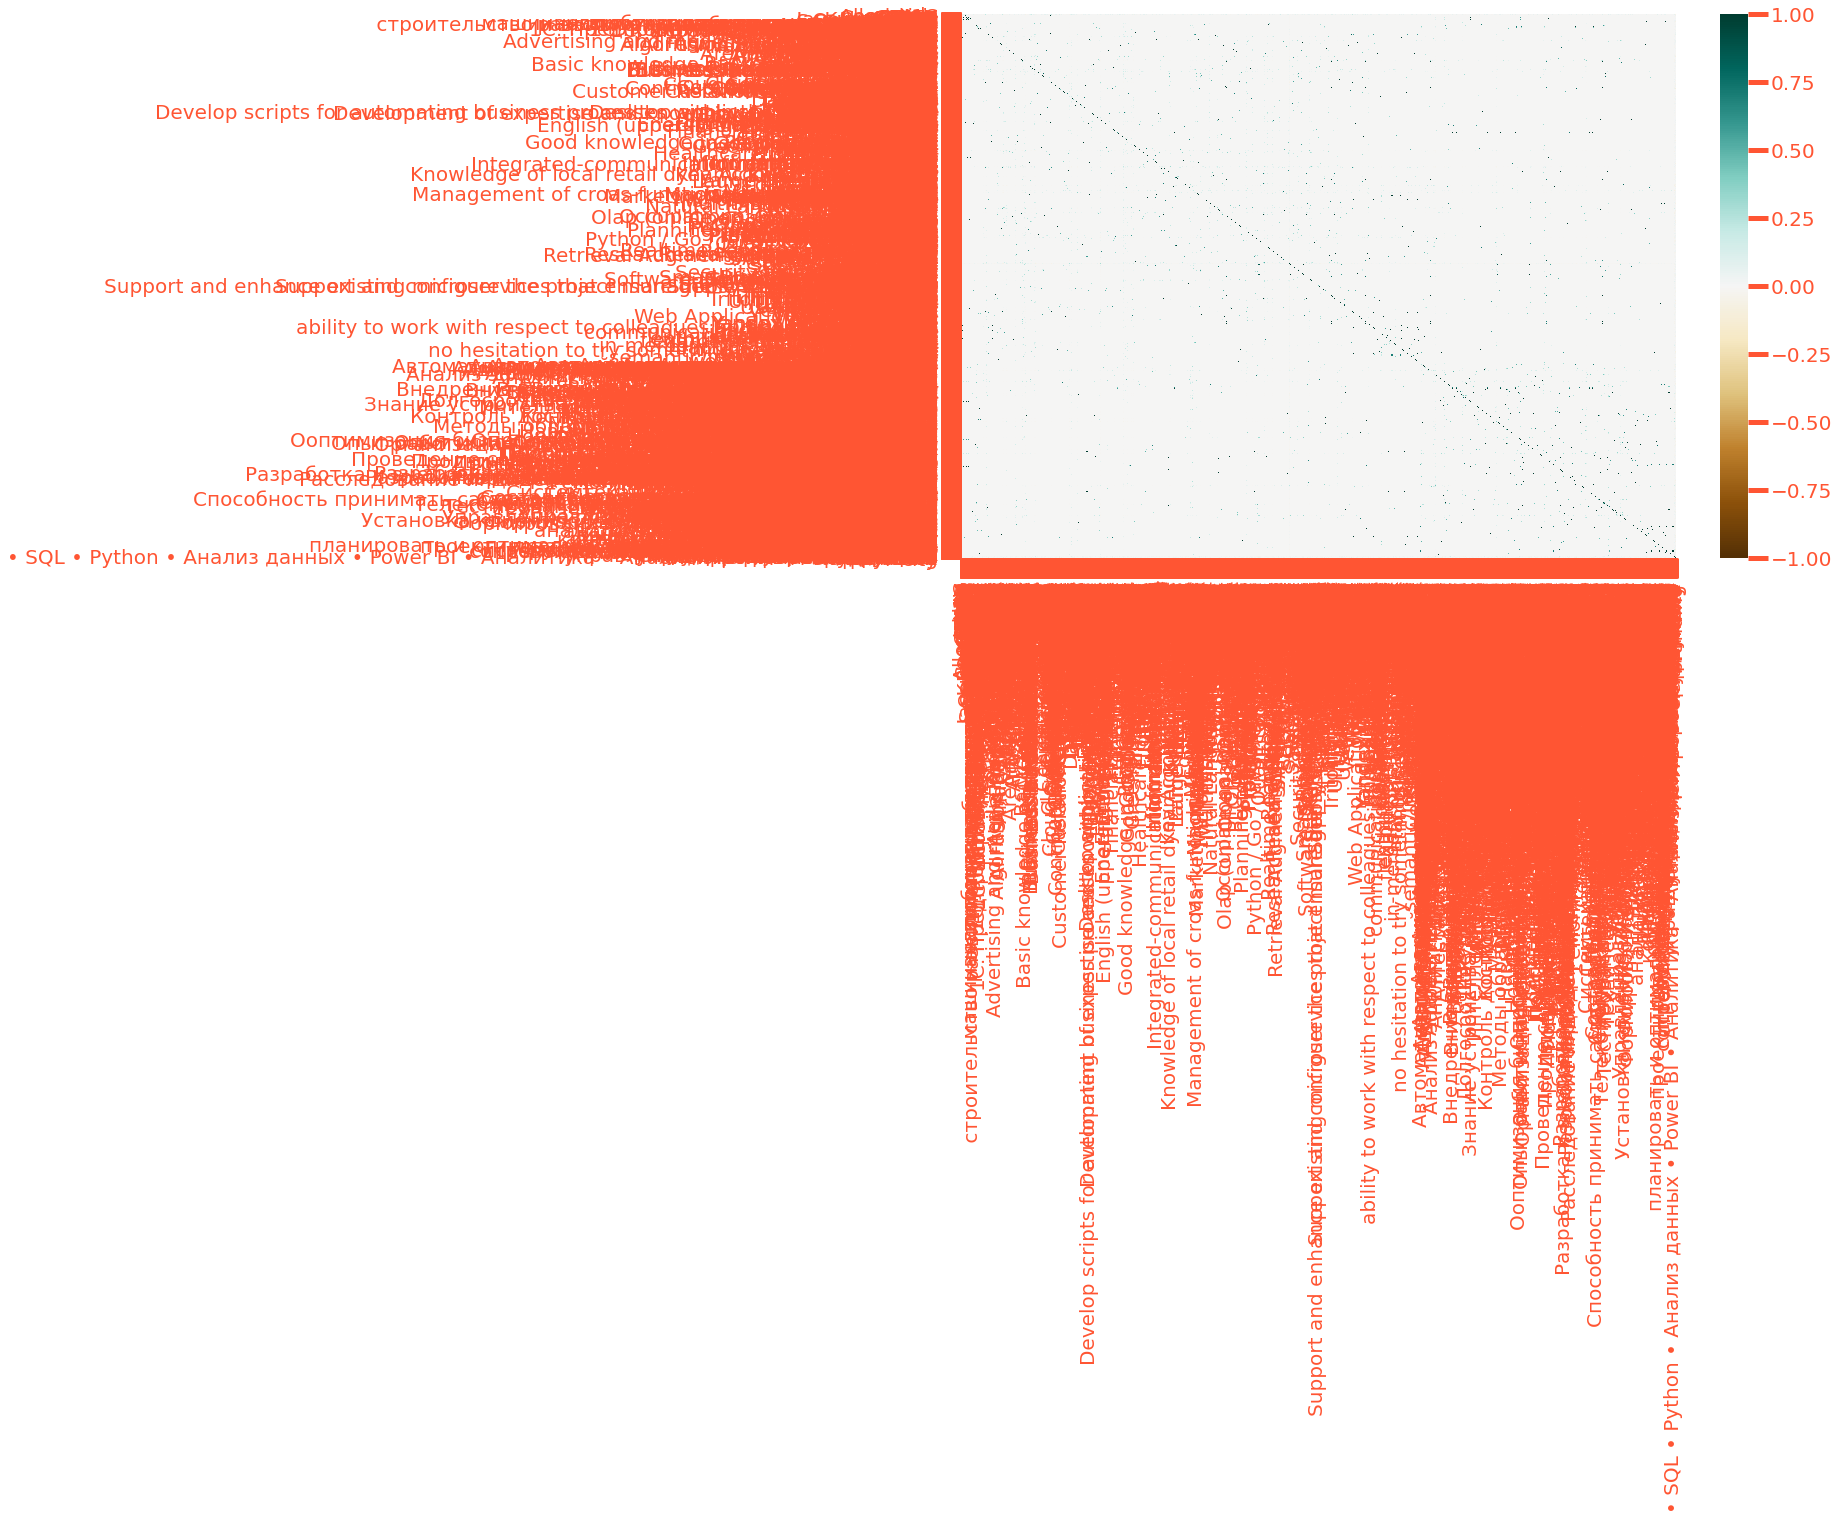

In [24]:
### Изобразим в виде Тепловой карты
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
sns.heatmap(df[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)
plt.show()

In [25]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
 Java или C++                  Ооптимизация бизнес-процессов с помощью IoT-технологий.    1.0
audio                          speech enhancement                                         1.0
a/b-experiments                lightgbm                                                   1.0
                               neural nets                                                1.0
Тестовая стратегия             Тестовые данные                                            1.0
a/b-experiments                nlp                                                        1.0
                               presto                                                     1.0
                               pytorch                                                    1.0
                               scikit-learn                                               1.0
Тестирование на проникновение  Техническая защита информации                              1.0
dtype: float64


In [26]:
print(df['salary'].describe())

count    3.231000e+03
mean     3.158182e+05
std      7.811872e+04
min      4.200000e+02
25%      3.158182e+05
50%      3.158182e+05
75%      3.158182e+05
max      1.119215e+06
Name: salary, dtype: float64


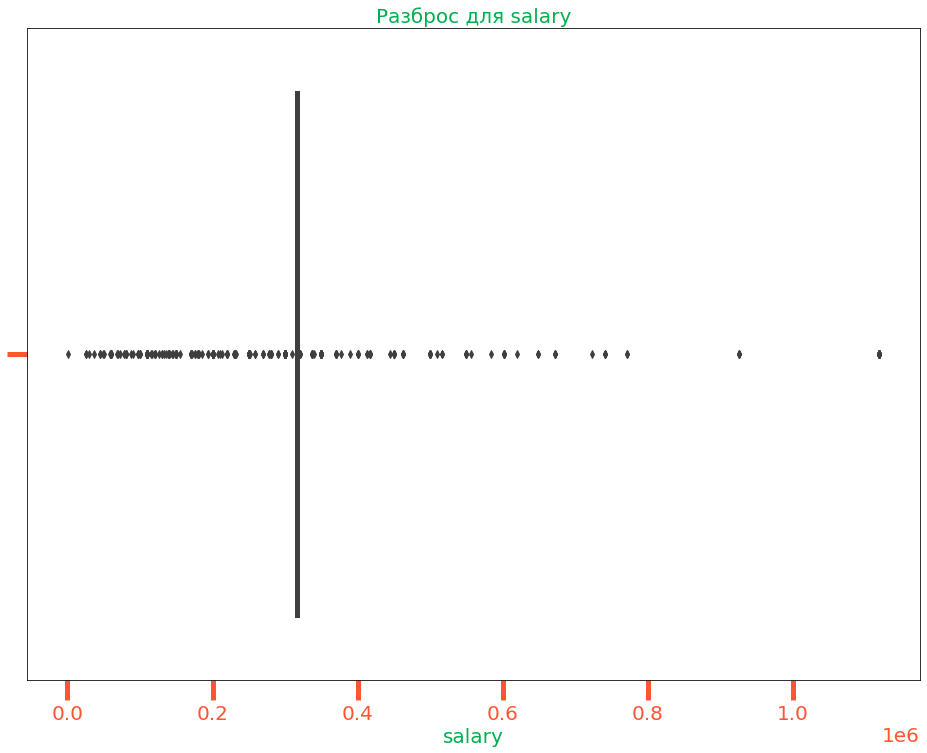

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.boxplot(x=df['salary'])
plt.title('Разброс для salary')
plt.show()

##### Уберем выбросы

In [28]:
print(df.shape)
df = df.drop('id', axis=True)

(3231, 2449)


In [29]:
df

role        salary  need_eng   1C   Allocation   Aris   Azure   BPMN  \
0       51  1.119215e+06         0    0            0      0       0      0   
1       60  9.671180e+04         0    0            0      0       0      0   
2       10  3.158182e+05         1    0            0      0       0      0   
3       51  3.158182e+05         0    0            0      0       0      0   
4       48  6.000000e+04         0    0            0      0       0      0   
...    ...           ...       ...  ...          ...    ...     ...    ...   
3226     0  3.158182e+05         0    0            0      0       0      0   
3227    51  3.158182e+05         0    0            0      0       0      0   
3228    51  3.158182e+05         0    0            0      0       0      0   
3229    51  3.158182e+05         0    0            0      0       0      0   
3230     0  3.158182e+05         1    0            0      0       0      0   

       CPLEX   CapsMan.   EAD   Excel   Fidelio   GCP)   Gurobi   IDEF0  \
0          0          0     0       0         0      0        0       0   
1          0          0     0       0         0      0        0       0   
2          0          0     0       0         0      0        0       0   
3          0          0     0       0         0      0        0       0   
4          0          0     0       0         0      0        0       0   
...      ...        ...   ...     ...       ...    ...      ...     ...   
3226       0          0     0       0         0      0        0       0   
3227       0          0     0       0         0      0        0       0   
3228       0          0     0       0         0      0        0       0   
3229       0          0     0       0         0      0        0       0   
3230       0          0     0       0         0      0        0       0   

       Java 11+)   Java или C++   Kubernetes   LGD   Logus   Optaplanner  \
0              0              0            0     0       0             0   
1              0              0            0     0       0             0   
2              0              0            0     0       0             0   
3              0              0            0     0       0             0   
4              0              0            0     0       0             0   
...          ...            ...          ...   ...     ...           ...   
3226           0              0            0     0       0             0   
3227           0              0            0     0       0             0   
3228           0              0            0     0       0             0   
3229           0              0            0     0       0             0   
3230           0              0            0     0       0             0   

       PP)   SCIP   Scrum)   Search Inform   Spector360)   TSP   construction  \
0        0      0        0               0             0     0              0   
1        0      0        0               0             0     0              0   
2        0      0        0               0             0     0              0   
3        0      0        0               0             0     0              0   
4        0      0        0               0             0     0              0   
...    ...    ...      ...             ...           ...   ...            ...   
3226     0      0        0               0             0     0              0   
3227     0      0        0               0             0     0              0   
3228     0      0        0               0             0     0              0   
3229     0      0        0               0             0     0              0   
3230     0      0        0               0             0     0              0   

       coordination   eEPC   ЕГАИС   анализ и управление требованиями  \
0                 0      0       0                                  0   
1                 0      0       0                                  0   
2                 0      0       0                             

In [30]:
def render_report(df):    
    plt.figure(figsize=(16, 6))
    plt.bar(df['model'], df['mape'], color='orange')
    plt.title('MAPE models values')
    plt.xlabel('Model')
    plt.ylabel('MAPE')
    plt.xticks(fontsize='small')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 6))
    plt.bar(df['model'], df['inference_time'], color='green')
    plt.title('Inference time models values')
    plt.xlabel('Model')
    plt.ylabel('Inference time')
    plt.tight_layout()
    plt.xticks(fontsize='small')
    plt.show()

In [31]:
!pip install optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

Y = df['salary']
X = df.drop(['salary'], axis=True)

learn_results = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Попробуем обучить Catboost(MAPE) модель с подбором параметров

In [34]:
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    depth = trial.suggest_int('depth', 4, 10)
    iterations = trial.suggest_int('iterations', 100, 500)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1, 10)
    model = CatBoostRegressor(
        learning_rate=learning_rate,
        depth=depth,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,
        silent=True
    )
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)
    y_pred = model.predict(X_test)

    return mape(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)


catboost_best_params = study.best_params
catboost_best_model = CatBoostRegressor(
    learning_rate=catboost_best_params['learning_rate'],
    depth=catboost_best_params['depth'],
    iterations=catboost_best_params['iterations'],
    l2_leaf_reg=catboost_best_params['l2_leaf_reg'],
    silent=True
)

catboost_best_model.fit(X_train, y_train)
y_pred = catboost_best_model.predict(X_test)
mape = mape(y_test, y_pred)
avg_inference_time = timeit.timeit(lambda: catboost_best_model.predict(X_test), number=100) / 100
print(f"Лучшие параметры: {catboost_best_params}")
print(f'MAPE: {mape}')

# learn_results.append({'model': 'Catboost+optuna', 'mape': mape, 'inference_time': avg_inference_time, 'best_params': catboost_best_params})

Лучшие параметры: {'learning_rate': 0.29868184388732694, 'depth': 9, 'iterations': 311, 'l2_leaf_reg': 2.2502415957685256}
MAPE: 6.920194637182404


#### Посмотрим на рейтинг признаков

In [35]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(catboost_best_model, threshold='mean', prefit=True)
selected_features = selector.get_support(indices=True)

most_important_features = [X.columns[i] for i in selected_features]
print("Наиболее важные признаки:", most_important_features)

Наиболее важные признаки: ['role', 'need_eng', 'AWS', 'Analytical skills', 'Apache JMeter', 'Big Data', 'Big Query', 'Bioinformatics', 'Business English', 'C/C++', 'CSS3', 'CatBoost', 'Celery', 'Churn prediction', 'D7', 'DL', 'Dart', 'Data Engineer', 'Dataflow', 'Docker', 'FastAPI', 'FastAPi', 'Flutter', 'Git', 'Google Analytics', 'Google Cloud Platform', 'Google Spanner', 'HTTP', 'Java', 'LLM', 'LTV prediction', 'MS SQL', 'Machine Learning', 'Medicine', 'Medtech', 'MongoDB', 'MySQL', 'NLP', 'Node.js', 'OSI', 'OpenCV', 'PLC programming ladder', 'PMBOK', 'Project management', 'PyTorch', 'Python', 'Python3', 'R', 'RAG', 'Raisecom', 'Recommender Systems', 'SOLID', 'SQL', 'Scrum', 'Senior', 'Shell', 'Spark', 'Telegram', 'TensorFlow', 'Time management', 'Ulift modeling', 'Wandb', 'Web Scraping', 'asinc.io', 'backend', 'blockchain', 'education', 'fast api', 'fundraising', 'go', 'machine learning', 'pandas', 'postgres', 'product analytics', 'software engineering', 'Автоматизация бизнес-процес

In [40]:
# Получение важности признаков
feature_importances = catboost_best_model.get_feature_importance()
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Вывод наиболее важных признаков
print("Наиболее важные признаки:")
print(importance_df.head(60))

Наиболее важные признаки:
                                                Feature  Importance
252                                               C/C++   38.028447
1627                                    Английский язык   16.650860
2442                                         experience   10.087655
2443                                           schedule    4.040857
0                                                  role    3.969981
2446                                               city    2.748370
2445                                           branding    1.825292
2441                                         employment    1.319004
1059                                Recommender Systems    1.115901
1                                              need_eng    0.791419
730                                                 LLM    0.709884
2192                                    Тайм-менеджмент    0.634336
1122                                                SQL    0.570249
1351                  

In [44]:
importance_df['Feature'].head(50)

252                                    C/C++
1627                         Английский язык
2442                              experience
2443                                schedule
0                                       role
2446                                    city
2445                                branding
2441                              employment
1059                     Recommender Systems
1                                   need_eng
730                                      LLM
2192                         Тайм-менеджмент
1122                                     SQL
1351                                   Wandb
1162                                  Senior
1418                              blockchain
2440                           is_it_company
2444                                   metro
2186    Стремление к профессиональному росту
224                           Bioinformatics
2171         Составление семантического ядра
218                                 Big Data
1648      

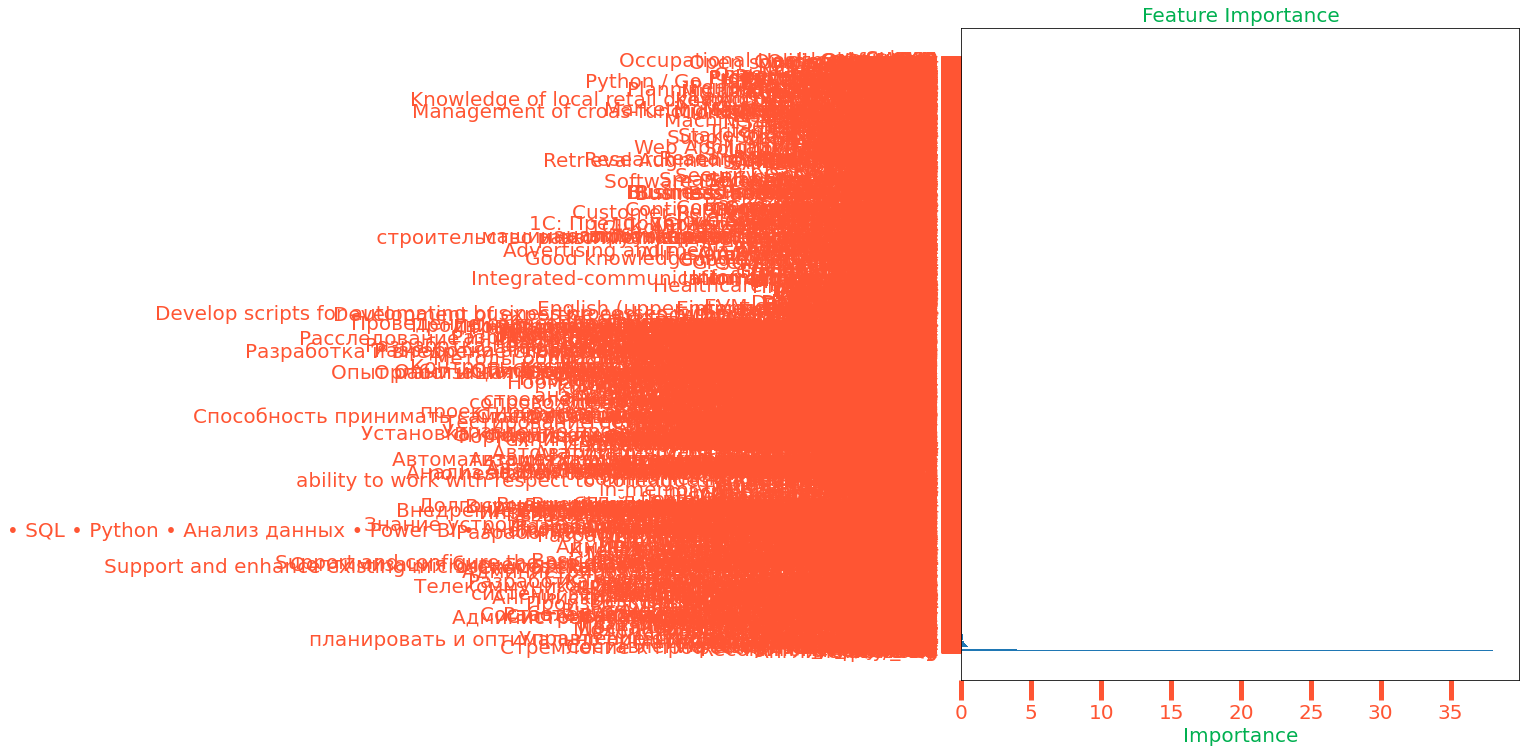

In [37]:
import matplotlib.pyplot as plt

# Визуализация важности признаков
plt.figure(figsize=(10, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
